# Seaborn

Another data visualization library based on Matplotlib

Examples of plots available in Seaborn

* Boxplot
* Bar plot
* Count plot
* Violin plot
* Swarm plot
* Histogram
* Heatmap
* more
* see https://seaborn.pydata.org/


In [1]:
#import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
tips = sns.load_dataset('tips') 
tips.head() #look at the data (first 5 rows)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot 

**Barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

[Text(0, 0, 'Thur'), Text(1, 0, 'Fri'), Text(2, 0, 'Sat'), Text(3, 0, 'Sun')]

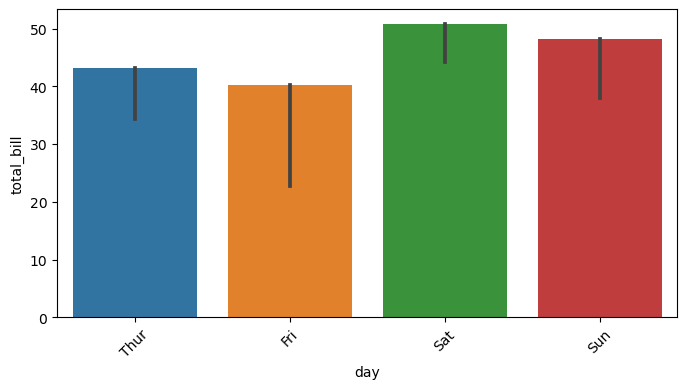

In [3]:
# Show the max (estimator = np.max) total bills received by day (using the mean function in numpy)
# Other numpy math functions can be use. e.g. np.max, np.min, np.sum...see documentation for more
plt.figure(figsize=(8,4)) # set fig size
# use func barplot with data=tips (dataframe 'tips')
# estimator can do calculations for the data (simple aggregate functions such as np.max, np.min, np.mean...)
ax = sns.barplot(x='day', y='total_bill', data=tips, estimator=np.max)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45) # see documentation for other features


### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

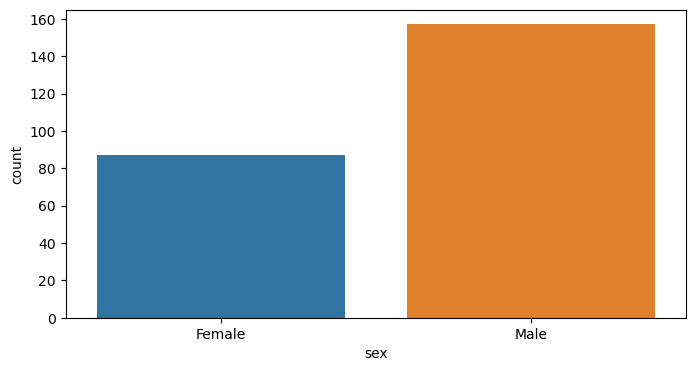

In [4]:
# set order of the bars
order = ['Female', 'Male']

plt.figure(figsize=(8,4))
sns.countplot(x='sex', data=tips, order=order) #Show the counts of male and female servers (var 'sex')


## boxplot and violinplot

Boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<Axes: xlabel='day', ylabel='total_bill'>

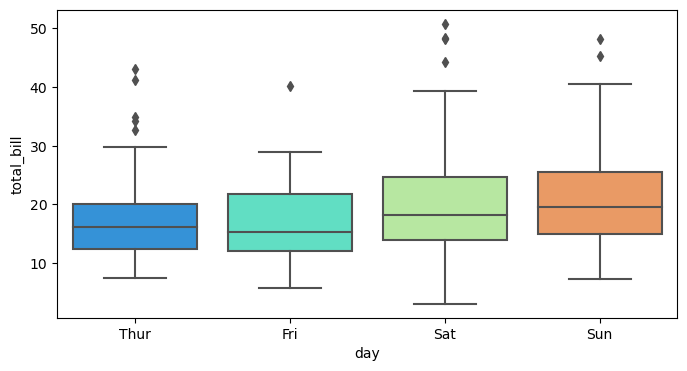

In [5]:
# Feel free to explore other parameters (e.g. palette)
# Distribution of total bills by day
plt.figure(figsize=(8,4))
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow') # see documention for other color palettes


<Axes: xlabel='day', ylabel='total_bill'>

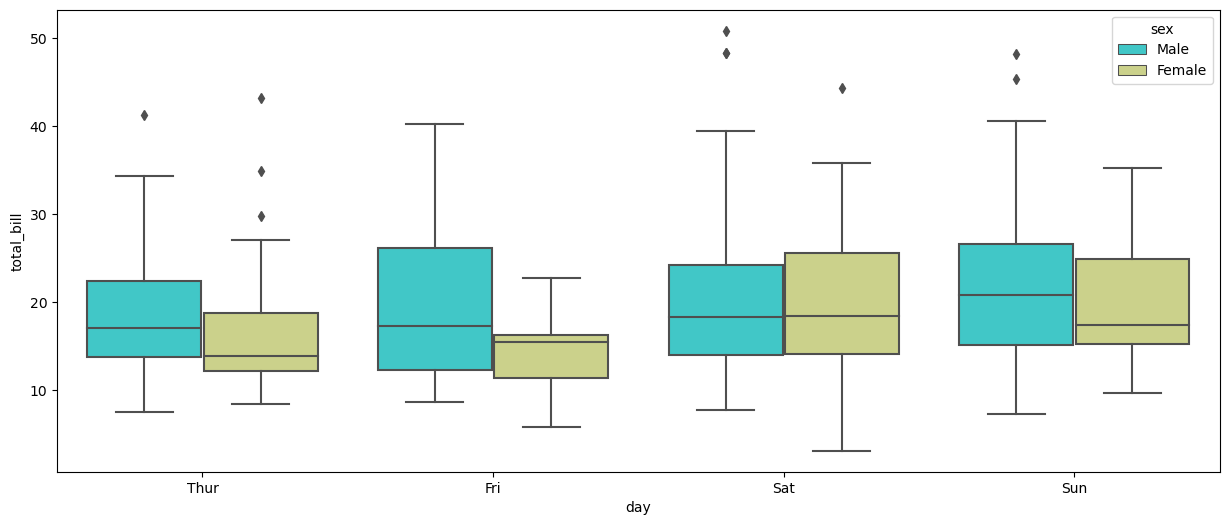

In [6]:
# Feel free to explore other parameters 
# Distribution of total bills by day and sex of server
# hue is a third dimension
plt.figure(figsize=(15,6))
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="rainbow")

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<Axes: xlabel='day', ylabel='total_bill'>

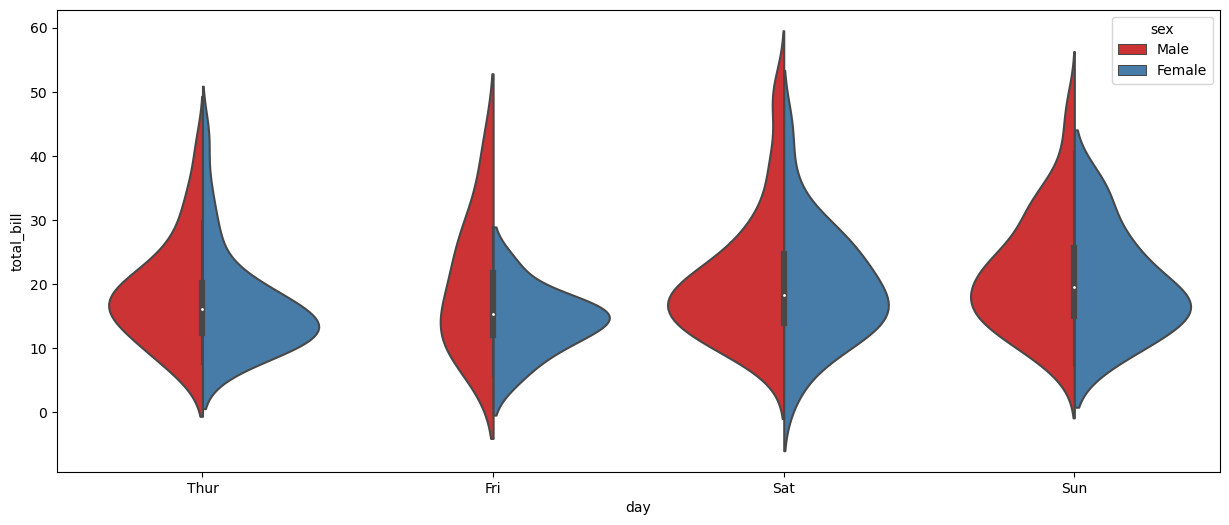

In [7]:
# Feel free to explore other parameters (e.g. palette, hue, split)
# Distribution of total bills aggregated and by sex of server on sides
plt.figure(figsize=(15,6))
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set1')


## swarmplot
The swarmplot is similar to stripplot (you can explore this too), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<Axes: xlabel='day', ylabel='total_bill'>

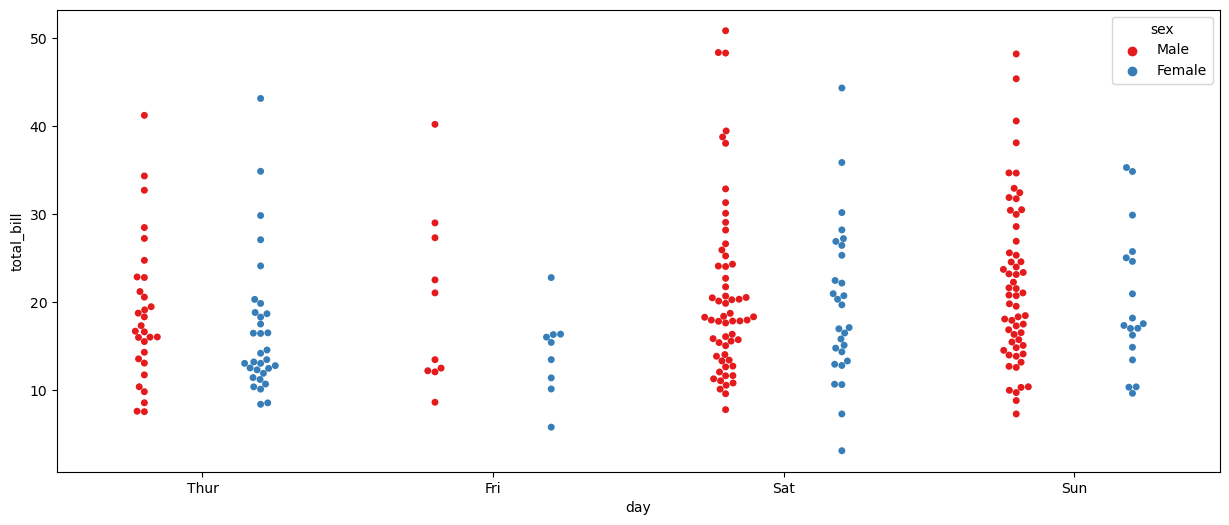

In [8]:
# Distribution of total bills by sex 
plt.figure(figsize=(15,6))
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips, palette='Set1', dodge=True)


## distplot

The distplot shows the distribution of a univariate set of observations.

C:\Users\andyc\AppData\Local\Temp\ipykernel_6448\3620635663.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

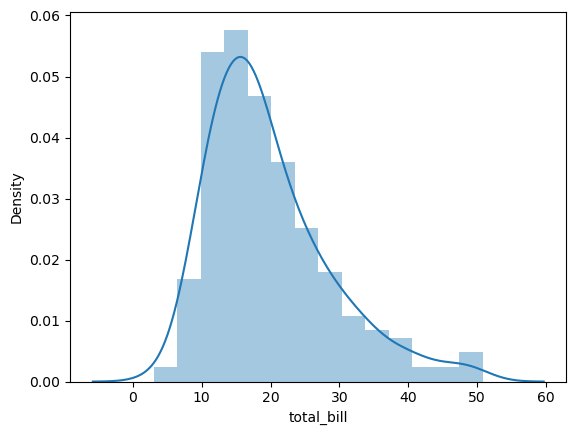

In [9]:
# Histogram and density curve of total bills overlapping
sns.distplot(tips['total_bill'])

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

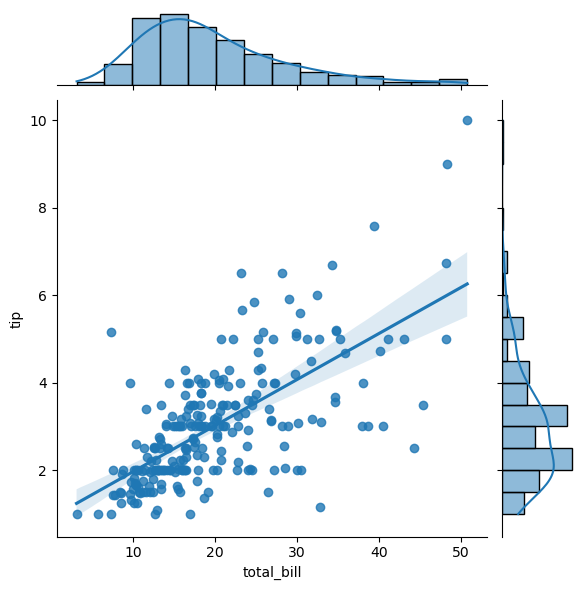

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg') # choose 'reg' for regression

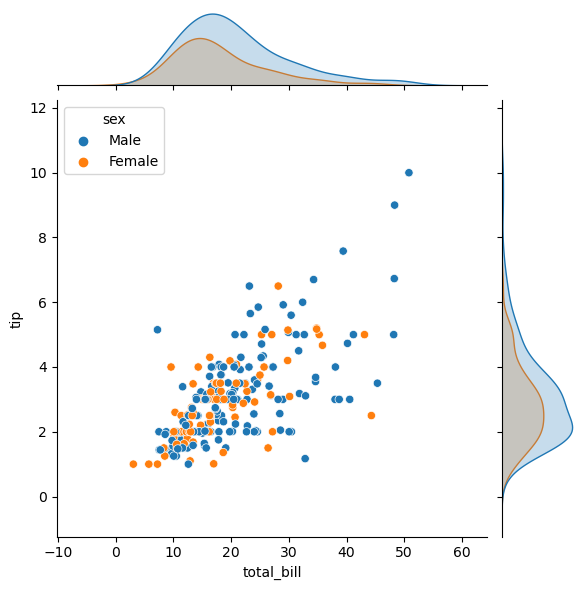

In [11]:
# scatterplot of total bill vs. tip, segmented by sex of server
sns.jointplot(x='total_bill', y='tip', hue='sex', data=tips, kind='scatter')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

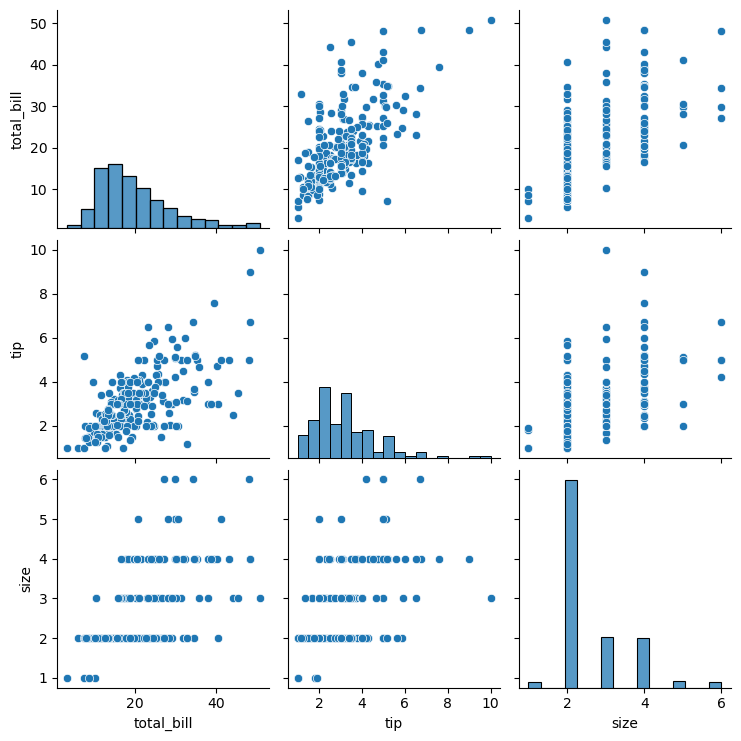

In [12]:
sns.pairplot(tips) # automatically use continuous vars


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [13]:
# Matrix form for correlation data
tips.corr()

C:\Users\andyc\AppData\Local\Temp\ipykernel_6448\3812684929.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


C:\Users\andyc\AppData\Local\Temp\ipykernel_6448\287888177.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr())


<Axes: >

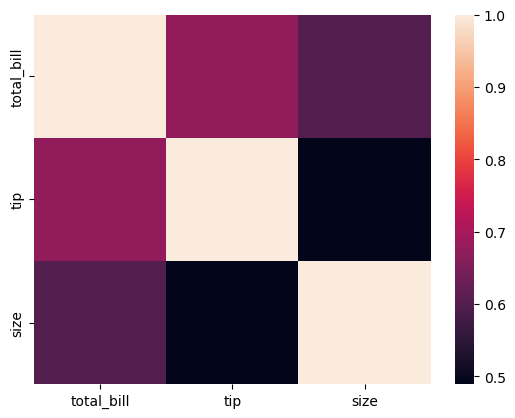

In [14]:
# Correlations among 3 variables color coded on a heat map
# see colors insetad of values
sns.heatmap(tips.corr())